#Multidimensional Access Methods

#Access Methods for Point Data
Multidimensional access methods for point data involve techniques to efficiently retrieve and manipulate data that is indexed by multiple dimensions. This typically includes methods like k-d trees, R-trees, and quad-trees.

In [ ]:
from scipy.spatial import KDTree

# Sample data points
points = [(1, 2), (3, 4), (5, 6), (7, 8)]

# Construct a k-d tree
kdtree = KDTree(points)

# Query the tree to find nearest neighbor to a point
query_point = (4, 5)
distance, nearest_idx = kdtree.query(query_point)

nearest_point = points[nearest_idx]
print("Nearest point to", query_point, "is", nearest_point, "with distance", distance)

Nearest point to (4, 5) is (3, 4) with distance 1.4142135623730951


In [ ]:
class QuadTreeNode:
    def __init__(self, x_min, y_min, x_max, y_max):
        self.x_min = x_min
        self.y_min = y_min
        self.x_max = x_max
        self.y_max = y_max
        self.points = []  # List to store points in this node
        self.children = [None, None, None, None]  # Children nodes (quadrants)

    def insert(self, point):
        x, y = point
        if self.x_min <= x <= self.x_max and self.y_min <= y <= self.y_max:
            if all(child is None for child in self.children):  # Leaf node condition
                self.points.append(point)
                if len(self.points) > 5:  # Split if node has more than 5 points
                    self.split()
            else:
                # Insert into appropriate child quadrant
                quadrant_index = self.get_quadrant_index(x, y)
                if self.children[quadrant_index] is None:
                    self.children[quadrant_index] = self.create_child(quadrant_index)
                self.children[quadrant_index].insert(point)

    def split(self):
        # Divide the node's region into four quadrants
        x_mid = (self.x_min + self.x_max) / 2
        y_mid = (self.y_min + self.y_max) / 2
        self.children[0] = QuadTreeNode(self.x_min, self.y_min, x_mid, y_mid)  # NW
        self.children[1] = QuadTreeNode(x_mid, self.y_min, self.x_max, y_mid)  # NE
        self.children[2] = QuadTreeNode(self.x_min, y_mid, x_mid, self.y_max)  # SW
        self.children[3] = QuadTreeNode(x_mid, y_mid, self.x_max, self.y_max)  # SE

        # Reassign points to child nodes
        for point in self.points:
            self.insert(point)
        self.points = []  # Clear points from parent node after splitting

    def get_quadrant_index(self, x, y):
        x_mid = (self.x_min + self.x_max) / 2
        y_mid = (self.y_min + self.y_max) / 2
        if x <= x_mid:
            if y <= y_mid:
                return 0  # NW
            else:
                return 2  # SW
        else:
            if y <= y_mid:
                return 1  # NE
            else:
                return 3  # SE

    def create_child(self, quadrant_index):
        x_mid = (self.x_min + self.x_max) / 2
        y_mid = (self.y_min + self.y_max) / 2
        if quadrant_index == 0:
            return QuadTreeNode(self.x_min, self.y_min, x_mid, y_mid)  # NW
        elif quadrant_index == 1:
            return QuadTreeNode(x_mid, self.y_min, self.x_max, y_mid)  # NE
        elif quadrant_index == 2:
            return QuadTreeNode(self.x_min, y_mid, x_mid, self.y_max)  # SW
        elif quadrant_index == 3:
            return QuadTreeNode(x_mid, y_mid, self.x_max, self.y_max)  # SE

    def query_range(self, x_min, y_min, x_max, y_max):
        results = []
        if self.x_min > x_max or self.x_max < x_min or self.y_min > y_max or self.y_max < y_min:
            return results  # No overlap

        for point in self.points:
            x, y = point
            if x_min <= x <= x_max and y_min <= y <= y_max:
                results.append(point)

        for child in self.children:
            if child is not None:
                results.extend(child.query_range(x_min, y_min, x_max, y_max))

        return results

# Example usage:
root_node = QuadTreeNode(0, 0, 100, 100)
points = [(20, 30), (10, 80), (50, 60), (70, 20), (90, 90)]
for point in points:
    root_node.insert(point)

# Query all points within a specific range
query_results = root_node.query_range(0, 0, 50, 50)
print("Points within range (0, 0) to (50, 50):", query_results)

Points within range (0, 0) to (50, 50): [(20, 30)]


#Access Methods for Non-Point Data
For non-point data, multidimensional access methods focus on efficiently managing and accessing data that spans multiple dimensions, such as spatial regions, polygons, or volumetric data. Examples include spatial indexing techniques like R-trees and quadtrees.

In [ ]:
!pip install rtree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.2/535.2 kB 7.4 MB/s eta 0:00:00


In [ ]:
from rtree import index

# Sample rectangles (bounding boxes)
rectangles = [(0, 0, 2, 2), (3, 3, 5, 5), (6, 6, 8, 8)]

# Create an R-tree index
idx = index.Index()
for i, rect in enumerate(rectangles):
    idx.insert(i, rect)

# Query the index to find rectangles intersecting with a given region
query_rect = (1, 1, 4, 4)
result = list(idx.intersection(query_rect))

print("Rectangles intersecting with", query_rect, "are:", result)

Rectangles intersecting with (1, 1, 4, 4) are: [0, 1]


#Curse of High-Dimensional Data
The curse of high-dimensional data refers to the increased complexity and challenges associated with data analysis and retrieval in high-dimensional spaces. As the number of dimensions increases, the volume of the space grows exponentially, leading to sparsity and inefficiency in traditional data access methods.

Dimensionality Reduction using PCA (Principal Component Analysis)

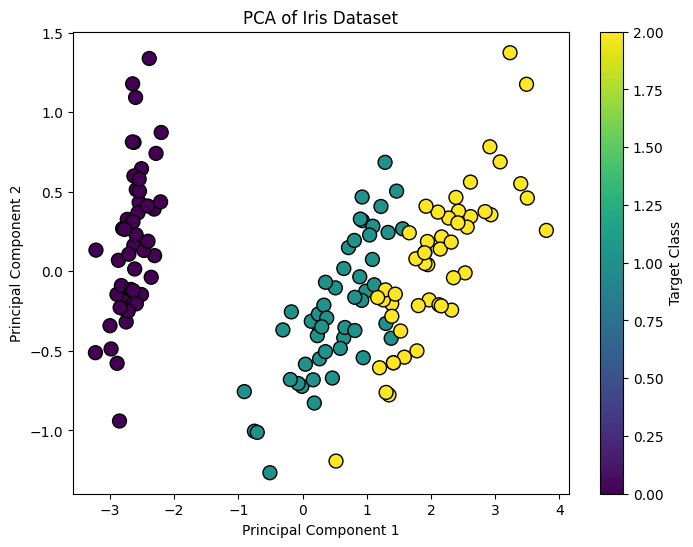

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load example dataset (e.g., Iris dataset)
data = load_iris()
X = data.data  # Features
y = data.target  # Target

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Class')
plt.show()

Feature Selection using SelectKBest (Univariate Feature Selection)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import load_iris
import numpy as np

# Load example dataset (e.g., Iris dataset)
data = load_iris()
X = data.data  # Features
y = data.target  # Target

# Select the top 2 features based on ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)

# Print the indices of the selected features
selected_indices = np.where(selector.get_support())[0]
print("Selected Feature Indices:", selected_indices)

Selected Feature Indices: [2 3]


In [ ]:
!pip install lshashpy3

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 5.4 MB/s eta 0:00:00
  Created wheel for lshashpy3: filename=lshashpy3-0.0.9-py3-none-any.whl size=8875 sha256=6376551594953e55a2515e187677a72d367d7df9040e4f87deb587a3b5ede8b4
  Stored in directory: /root/.cache/pip/wheels/5f/f0/83/666c2757c9fbd2d87814f40a5fc3444d3a81cf8f6a912e4321
Successfully built lshashpy3


Utilizing Locality-Sensitive Hashing (LSH) for Nearest Neighbor Search

In [ ]:
from lshashpy3 import LSHash
import numpy as np

# Generate random high-dimensional data
data = np.random.randn(100, 100)

# Initialize LSH index
lsh = LSHash(hash_size=10, input_dim=100)

# Index data points into LSH index
for i in range(len(data)):
    lsh.index(data[i])

# Query nearest neighbors for a random data point
query_point = data[0]
result = lsh.query(query_point, num_results=5)

print("Nearest neighbors to query point:")
for neighbor in result:
    print(neighbor)

Nearest neighbors to query point:
(((0.4270503661935529, 1.7542970885246392, -1.2279088611189632, 0.4462393590169035, -1.429133160885075, 1.4678958978733319, 0.6800706585882181, 0.061308240678102824, -1.2780418896086818, -0.652873229070468, 0.328339245504395, -0.4963182190937189, 0.7879671536879802, -1.937438672154436, -1.057123411704126, -0.48423529296404083, -1.1942697136504807, 0.028068751219555217, 0.987914404502094, -0.5860617884179302, 0.48858397097654394, -1.187011217894919, 1.5922681088203778, -1.0585467517487384, 1.6158164785686595, -0.8903865409289804, -1.9887815053471218, -1.2564422494568284, 0.5851144119841158, -0.5501049105500474, 1.4256517177463446, 0.3806407531610224, 0.5388024832042346, 2.382504158230141, 1.7315180199117284, 1.6119105491075727, 0.2734305414106552, 0.005716461829226855, -0.43731896172731055, -1.1119489373534968, 0.8943270908855799, 0.8728655610177587, -1.0742477213298511, 0.8352237479558017, 0.22238107254348613, -0.26234395394945303, -0.9922906533020053,

#Multidimensional Structures Based on Hashing
Multidimensional structures based on hashing leverage hash functions to efficiently organize and access multidimensional data. Examples include locality-sensitive hashing (LSH), which allows for approximate nearest neighbor search in high-dimensional spaces.

In [1]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552448 sha256=841b5c151ebcddbf1631edacc940bf0b4774d263a15db73eb96a007287026870
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [2]:
from annoy import AnnoyIndex
import numpy as np

# Generate random high-dimensional data
data = np.random.random((100, 10))  # 100 samples, each with 10 dimensions

# Set up AnnoyIndex for approximate nearest neighbor search
index = AnnoyIndex(10, 'euclidean')  # 10 dimensions, using Euclidean distance

# Add data points to Annoy index
for i, vector in enumerate(data):
    index.add_item(i, vector)

# Build the Annoy index
index.build(10)  # Number of trees (higher value gives higher precision in search)

# Query the Annoy index for approximate nearest neighbors
query_point = np.random.random(10)  # Query point with 10 dimensions
n_neighbors = 5
approximate_neighbors = index.get_nns_by_vector(query_point, n_neighbors)

print("Approximate nearest neighbors to query point are:", approximate_neighbors)

Approximate nearest neighbors to query point are: [57, 61, 85, 95, 97]
